<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
        <img src="../figs/uoc_masterbrand_3linies_positiu.png", align="left">
    </div>
    <div style="float: right; width: 50%;">
       <p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades</p>
        <p style="margin: 0; text-align:right;">Màster universitari en Ciència de dades (<i>Data science</i>)</p>
        <p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'informàtica, multimèdia i telecomunicació</p>
    </div>
</div>
<div style="width:100%;">&nbsp;</div>

# Agrupament jeràrquic amb _shopping-data_

El problema que resoldrem en aquesta secció és el de segmentar els clients en diferents grups segons les seves tendències de compra, emprant el dataset `shopping-data`.

In [1]:
# Importem les llibreries que ens faran falta
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
customer_data = pd.read_csv("../data/shopping-data.csv")

A continuació, explorarem una mica el dataset.

In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Veiem que el nostre dataset té 5 columnes:
- el codi de client
- el gènere
- l'edat
- els ingressos anuals
- les despeses dels clients

Vegem els resultats a l'espai de característiques bidimensional. Per fer-ho, hem d'«eliminar» d'alguna manera tres columnes. 

En aquest cas és interessant analitzar les dues darreres (els ingressos anuals de les persones i el que es gasten) per veure si trobem alguna relació interessant entre elles. 

Per tant, filtrem amb la funció `iloc` (mireu aquesta funció a [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)). 

In [5]:
data = customer_data.iloc[:, 3:5].values

I creem el dendograma com ho hem fet anteriorment. 

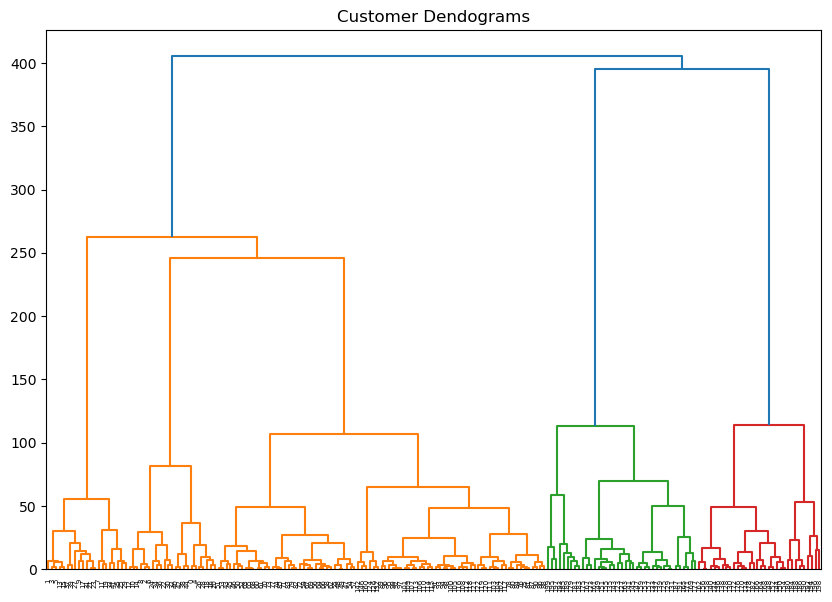

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method="ward"))

__Nota__: Aquí hem utilitzat el mètode `linkage`. Aquest mètode minimitza les distàncies com a paràmetres, però ho podríem haver fet amb un altre mètode. És interessant mirar com canvia el resultat en fer-ho de diferents maneres. 

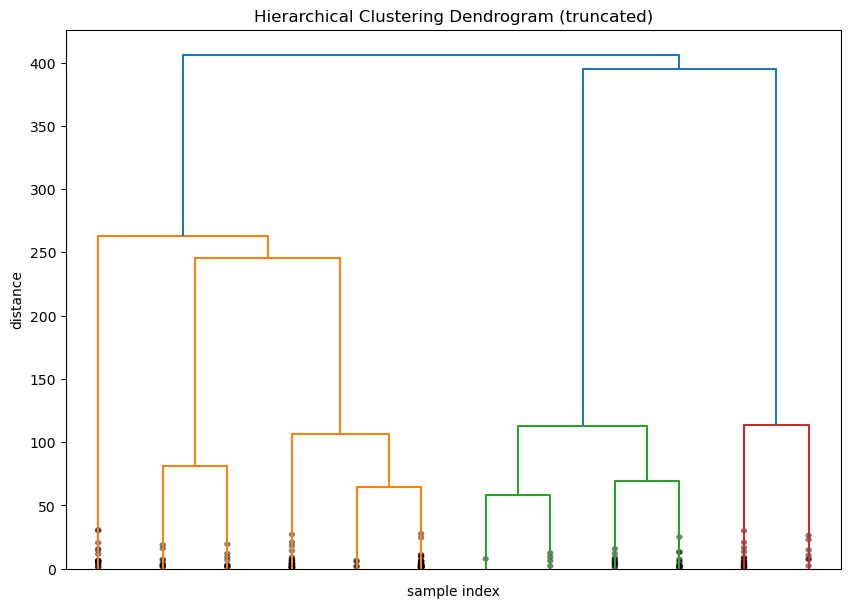

In [7]:
from scipy.cluster.hierarchy import cophenet, linkage, dendrogram
from scipy.spatial.distance import pdist

Z = linkage(data, "ward")

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("sample index")
plt.ylabel("distance")
dendrogram(
    Z,
    truncate_mode="lastp",  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.0,
    leaf_font_size=12.0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

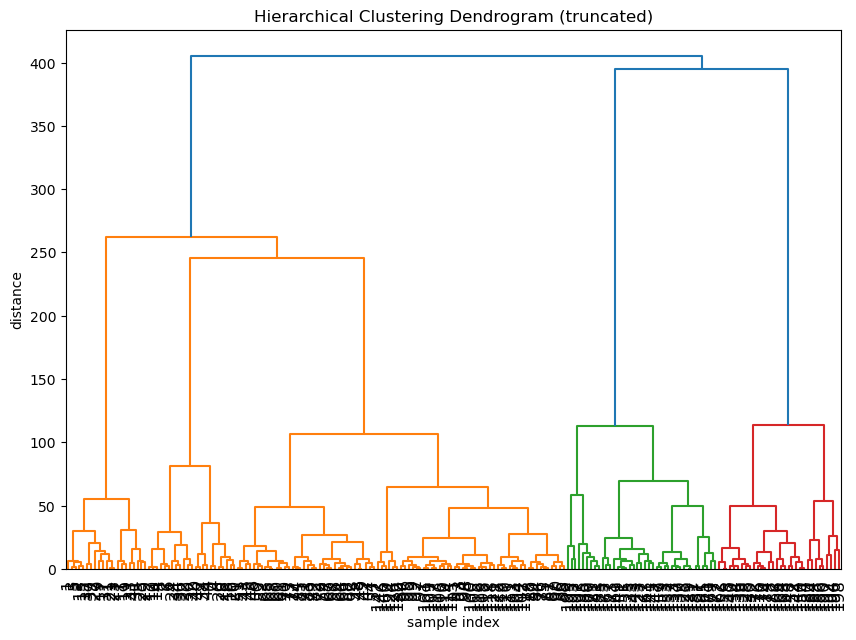

In [8]:
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("sample index")
plt.ylabel("distance")
dendrogram(
    Z,
    truncate_mode="level",  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.0,
    leaf_font_size=12.0,
    show_contracted=False,  # to get a distribution impression in truncated branches
)
plt.show()

Un cop hem vist els diferents dendogrames, veurem ara els clústers que tenim del dendograma.

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

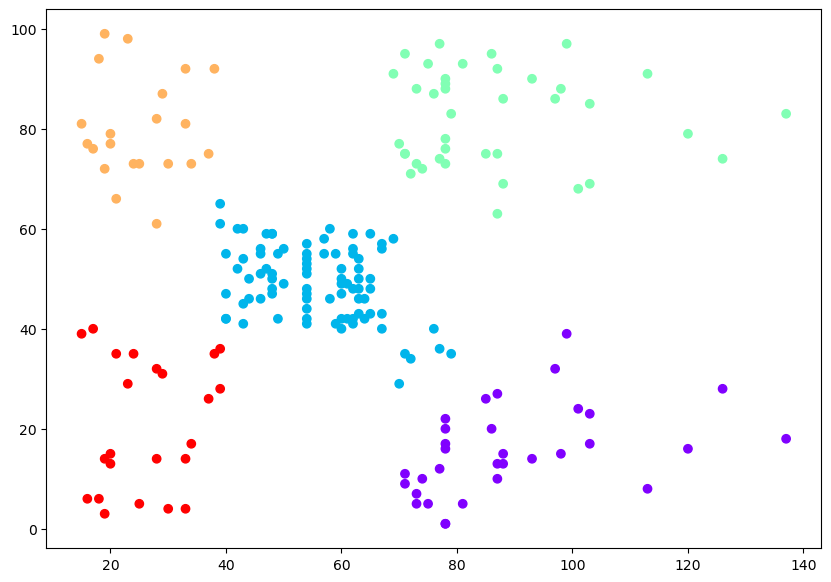

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap="rainbow")

A l'apartat anterior, el que hem fet és establir un nombre de clústers que nosaltres hem considerat coherent. I per què 5? Perquè al dendograma anterior hem vist que amb 5 ja tenim un nombre de clústers que tenen força punts, per la qual cosa en principi sembla un bon candidat.

Una altra cosa important a tenir en compte és jugar amb els paràmetres. 

Per exemple:

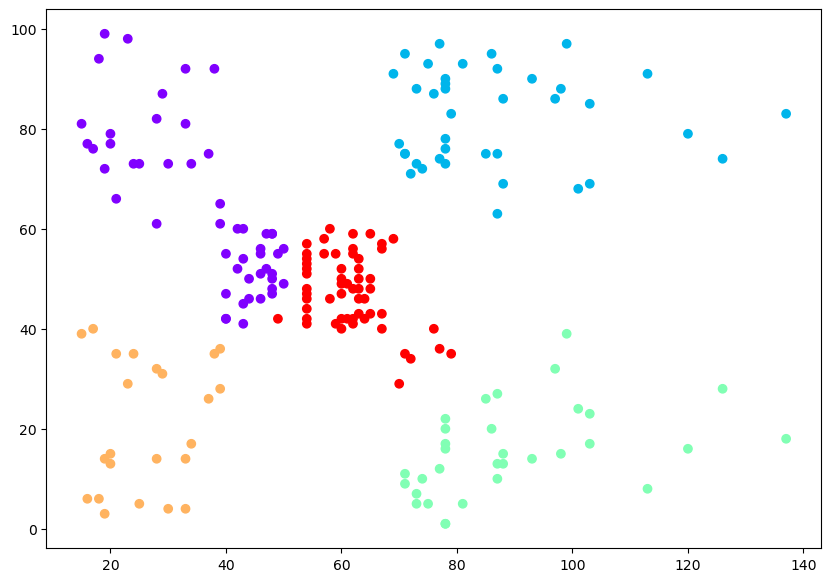

In [11]:
cluster = AgglomerativeClustering(n_clusters=5, metric="manhattan", linkage="complete")
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap="rainbow")

Aquí, per exemple, hem fet servir la distància Manhattan en comptes de la distància euclidiana. També podem fer-ho amb la distància cosinus.

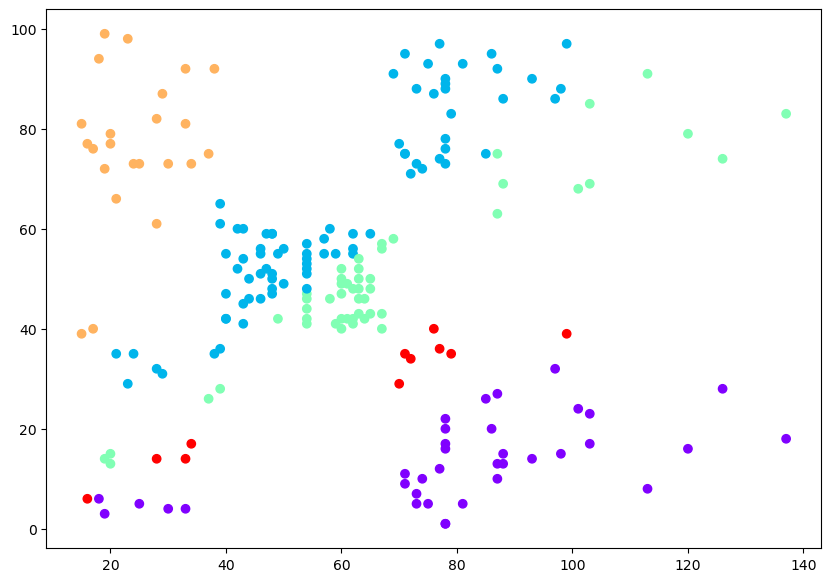

In [12]:
cluster = AgglomerativeClustering(n_clusters=5, metric="cosine", linkage="complete")
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap="rainbow")

Com podem veure, els clústers han canviat.

Per tant, és important la mètrica que utilitzem per «linkar» els clústers, així com el criteri utilitzat per al seu linkage (agrupació).